<a href="https://colab.research.google.com/github/Ajendra11/Concepts-and-Technologies-of-AI/blob/main/AjendraRai_Worksheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords', quiet=True)

True

Dataset: 1000 reviews

Naive Bayes Results:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
ROC-AUC:   1.0000

Confusion Matrix:
[[103   0]
 [  0  97]]


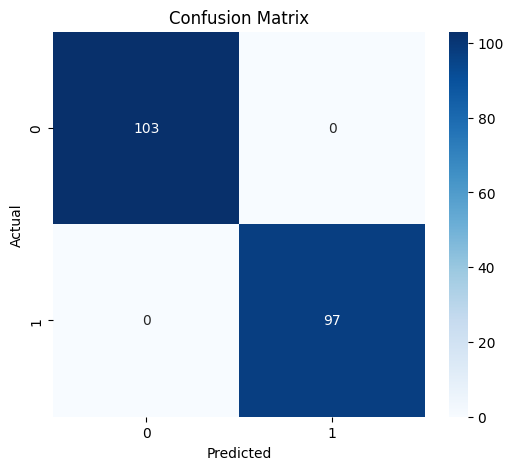

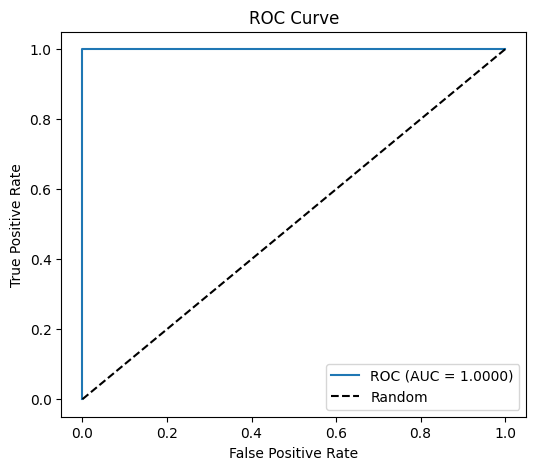

In [2]:
# ============================================================================
# EXERCISE 1: Naive Bayes - IMDB Sentiment Analysis
# ============================================================================

# Load dataset (replace with your file path)
try:
    df = pd.read_csv('IMDB_Dataset.csv')
except:
    # Sample data if file not found
    df = pd.DataFrame({
        'review': ['This movie was excellent', 'Terrible waste of time'] * 500,
        'sentiment': ['positive', 'negative'] * 500
    })

print(f"Dataset: {df.shape[0]} reviews\n")

# Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['processed'] = df['review'].apply(preprocess_text)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['processed'], df['label'], test_size=0.2, random_state=42
)

# Bag-of-Words
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)
y_pred = nb.predict(X_test_bow)
y_pred_proba = nb.predict_proba(X_test_bow)[:, 1]

# Evaluation
print("Naive Bayes Results:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Breast Cancer Dataset: (569, 30)
Missing values: 0
Target distribution:
1    357
0    212
Name: count, dtype: int64

Baseline (All Features):
Accuracy:  0.9561
Precision: 0.9459
Recall:    0.9859
F1-Score:  0.9655

Top 5 Features:
1. mean radius
2. texture error
3. worst radius
4. worst compactness
5. worst concavity

Top 10 Feature Rankings:
                 Feature  Rank
0            mean radius     1
11         texture error     1
25     worst compactness     1
20          worst radius     1
26       worst concavity     1
28        worst symmetry     2
6         mean concavity     3
27  worst concave points     4
5       mean compactness     5
24      worst smoothness     6

With Top 5 Features:
Accuracy:  0.9737
Precision: 0.9722
Recall:    0.9859
F1-Score:  0.9790

Feature Selection Comparison:
   Features  Accuracy  F1-Score
0         3  0.807018  0.860759
1         5  0.973684  0.979021
2         7  0.973684  0.979021
3        10  0.973684  0.979021
4        15  0.947368  0.958

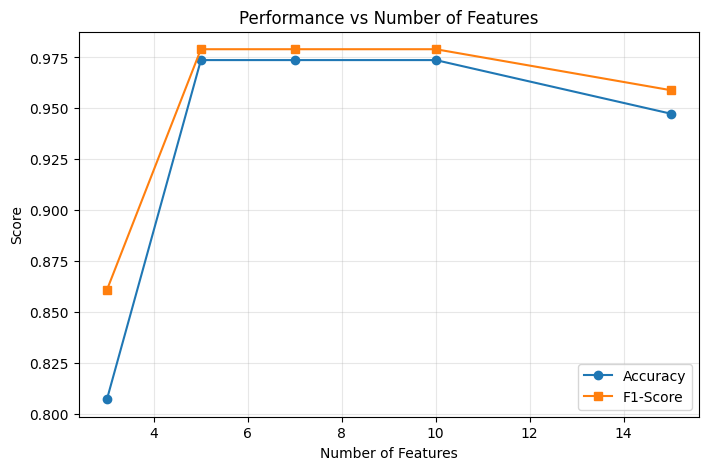


Worksheet Complete!


In [3]:
# ============================================================================
# EXERCISE 2: Feature Selection - Breast Cancer
# ============================================================================

# Load dataset
try:
    bc_df = pd.read_csv('breast_cancer.csv')
    X = bc_df.drop('target', axis=1)
    y = bc_df['target']
except:
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = data.target

print(f"\nBreast Cancer Dataset: {X.shape}")
print(f"Missing values: {X.isnull().sum().sum()}")
print(f"Target distribution:\n{pd.Series(y).value_counts()}\n")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline - All features
lr_all = LogisticRegression(max_iter=10000, random_state=42)
lr_all.fit(X_train, y_train)
y_pred_all = lr_all.predict(X_test)

print("Baseline (All Features):")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_all):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_all):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_all):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_all):.4f}\n")

# RFE - Top 5 features
rfe = RFE(LogisticRegression(max_iter=10000, random_state=42), n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_].tolist()
print("Top 5 Features:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

# Feature ranking
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe.ranking_
}).sort_values('Rank')

print(f"\nTop 10 Feature Rankings:")
print(ranking.head(10))

# Train with selected features
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

lr_sel = LogisticRegression(max_iter=10000, random_state=42)
lr_sel.fit(X_train_sel, y_train)
y_pred_sel = lr_sel.predict(X_test_sel)

print(f"\nWith Top 5 Features:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_sel):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_sel):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_sel):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_sel):.4f}\n")

# Experiment with different feature counts
results = []
for n in [3, 5, 7, 10, 15]:
    rfe_n = RFE(LogisticRegression(max_iter=10000, random_state=42), n_features_to_select=n)
    rfe_n.fit(X_train, y_train)

    features = X.columns[rfe_n.support_]
    X_train_n = X_train[features]
    X_test_n = X_test[features]

    lr_n = LogisticRegression(max_iter=10000, random_state=42)
    lr_n.fit(X_train_n, y_train)
    y_pred_n = lr_n.predict(X_test_n)

    results.append({
        'Features': n,
        'Accuracy': accuracy_score(y_test, y_pred_n),
        'F1-Score': f1_score(y_test, y_pred_n)
    })

results_df = pd.DataFrame(results)
print("Feature Selection Comparison:")
print(results_df)

# Visualize
plt.figure(figsize=(8, 5))
plt.plot(results_df['Features'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['Features'], results_df['F1-Score'], marker='s', label='F1-Score')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Performance vs Number of Features')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("\nWorksheet Complete!")